# SEaM data plotter

Plots the data from a SEaM spreadsheet as a series of bar charts. Change the filename in the marked cell to input from a new spreadsheet, then run all.

AFAIK, the data is in a standard format.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [2]:
# Change this line to read the seam file

feedback_df=pd.read_excel('SEaM Open Comments for TM351-2017J Faculty of Science Technology Engineering and Mathematics .xlsx', sheet_name=2)

Check the contents of the dataframe:

In [3]:
feedback_df.head()

,coursepres,q1:The way the module materials were presented helped to maintain my interest.,q2:The study workload on this module fitted with my personal circumstances.,q3:The structure of the module meant I could interact with my peers when learning.,q4:Resources I accessed through the Library (e.g. journal articles) helped me to understand the core concepts of the module.,q5:I was satisfied with the opportunities I had to attend tutorials (either face to face or online).,"q6:Sufficient opportunities were provided to check my understanding on the module, for example by completing iCMAs or TMAs.",q7:The instructions on how to complete the assessed tasks were easy to follow.,q8:It was obvious how the module materials related to the assessed tasks on this module.,q9:There was enough time in the study planner to prepare for the end of module assessment.,...,q17:My tutors feedback on assessed tasks helped me to learn.,q18:My tutor supported me in developing professional or work-related skills.,q19:I have received sufficient advice and guidance in relation to my module.,q20:I have a clear idea about my next module choice.,q21:I was satisfied with the quality of the module.,q22:I would recommend OU study to other students.,q23:My studies have helped me develop my self-confidence.,"If you answered Disagree to any of the statements above, we would like to understand why so we can make improvements in the future","Do you have any further comments about your teaching, assessment and learning on this module?",Do you have any other comments to add about your study experience on this module?
0,TM351-2017J,2. Mostly agree,2. Mostly agree,5. Definitely disagree,1. Definitely agree,1. Definitely agree,2. Mostly agree,2. Mostly agree,1. Definitely agree,5. Definitely disagree,...,1. Definitely agree,3. Neither agree nor disagree,2. Mostly agree,1. Definitely agree,1. Definitely agree,1. Definitely agree,1. Definitely agree,"Two weeks at the end of the course, was not su...",The first four notebooks need to be released b...,NaN
1,TM351-2017J,1. Definitely agree,2. Mostly agree,2. Mostly agree,3. Neither agree nor disagree,2. Mostly agree,1. Definitely agree,1. Definitely agree,2. Mostly agree,2. Mostly agree,...,2. Mostly agree,2. Mostly agree,1. Definitely agree,6. Not applicable/used,1. Definitely agree,2. Mostly agree,3. Neither agree nor disagree,NaN,NaN,NaN
2,TM351-2017J,2. Mostly agree,2. Mostly agree,1. Definitely agree,2. Mostly agree,1. Definitely agree,1. Definitely agree,2. Mostly agree,2. Mostly agree,2. Mostly agree,...,1. Definitely agree,1. Definitely agree,1. Definitely agree,1. Definitely agree,1. Definitely agree,2. Mostly agree,1. Definitely agree,I did not enter disagree in any of the boxes b...,All tutors seemed enthusiastic and engaged wit...,"I understand that in previous presentations , ..."
3,TM351-2017J,2. Mostly agree,2. Mostly agree,1. Definitely agree,1. Definitely agree,1. Definitely agree,1. Definitely agree,2. Mostly agree,1. Definitely agree,2. Mostly agree,...,1. Definitely agree,1. Definitely agree,1. Definitely agree,2. Mostly agree,1. Definitely agree,1. Definitely agree,1. Definitely agree,NaN,NaN,NaN
4,TM351-2017J,2. Mostly agree,2. Mostly agree,3. Neither agree nor disagree,2. Mostly agree,3. Neither agree nor disagree,1. Definitely agree,1. Definitely agree,1. Definitely agree,2. Mostly agree,...,2. Mostly agree,3. Neither agree nor disagree,2. Mostly agree,3. Neither agree nor disagree,1. Definitely agree,1. Definitely agree,2. Mostly agree,"Very much enjoyed the module, and what I have ...",NaN,NaN


Next, want to collect all the questions which were answered with a selected grade. The actual graded answers are the ones in the next cell:

In [4]:
gradedAnswers_set={'1. Definitely agree',
                   '2. Mostly agree',
                   '3. Neither agree nor disagree',
                   '4. Mostly disagree',
                   '5. Definitely disagree',
                   '6. Not applicable/used',
                   'Student did not answer this question'}

Next, create a dataframe `plotData_df` which will contain the number of each response by question. For now, want the columns as the grades, and the index as the questions:

In [5]:
plotData_df=pd.DataFrame(columns=sorted(list(gradedAnswers_set)),
                         index=list([c for c in feedback_df.columns 
                                     if set(feedback_df[c]) <= gradedAnswers_set]))
plotData_df.head()


,1. Definitely agree,2. Mostly agree,3. Neither agree nor disagree,4. Mostly disagree,5. Definitely disagree,6. Not applicable/used,Student did not answer this question
q1:The way the module materials were presented helped to maintain my interest.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q2:The study workload on this module fitted with my personal circumstances.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q3:The structure of the module meant I could interact with my peers when learning.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q4:Resources I accessed through the Library (e.g. journal articles) helped me to understand the core concepts of the module.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q5:I was satisfied with the opportunities I had to attend tutorials (either face to face or online).,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Next, need to populate the dataframe. Each cell should contain the number of times that class (in the columns) was selected for that question (in the index).

In [6]:
for q in plotData_df.index:
    for c in plotData_df:
        n=list(feedback_df[q]).count(c)
        plotData_df[c][q]=n
        
plotData_df.head()

,1. Definitely agree,2. Mostly agree,3. Neither agree nor disagree,4. Mostly disagree,5. Definitely disagree,6. Not applicable/used,Student did not answer this question
q1:The way the module materials were presented helped to maintain my interest.,11,37,12,3,3,0,237
q2:The study workload on this module fitted with my personal circumstances.,9,24,10,16,7,0,237
q3:The structure of the module meant I could interact with my peers when learning.,6,23,27,5,5,0,237
q4:Resources I accessed through the Library (e.g. journal articles) helped me to understand the core concepts of the module.,13,25,19,4,1,4,237
q5:I was satisfied with the opportunities I had to attend tutorials (either face to face or online).,16,30,12,1,3,4,237


**Now plot the data**

First, let's look at all the data to see just how few students actually responded to the request for feedback:

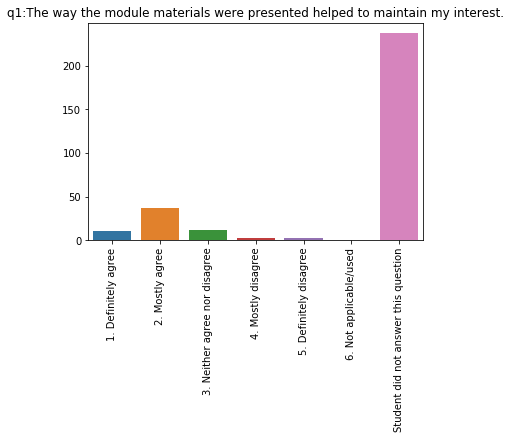

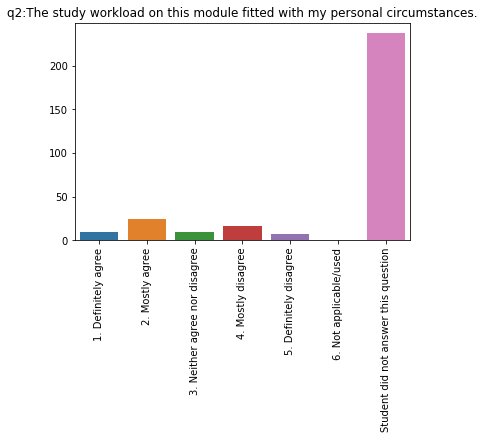

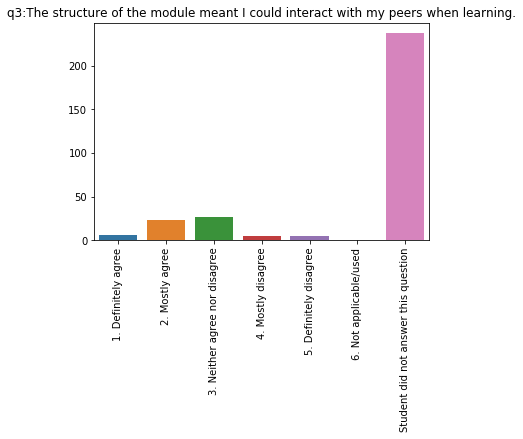

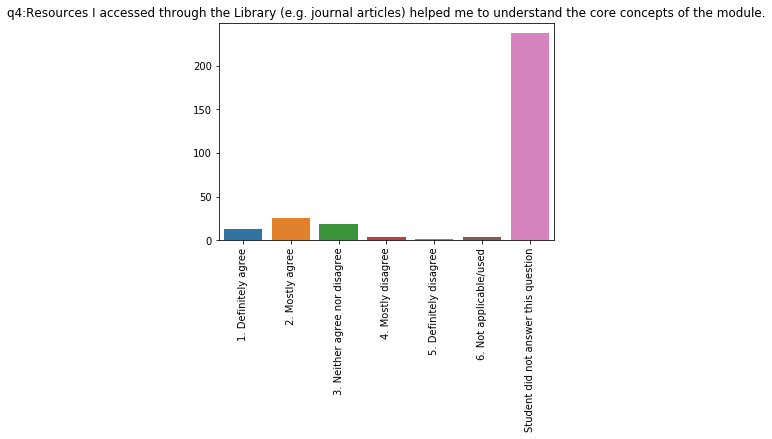

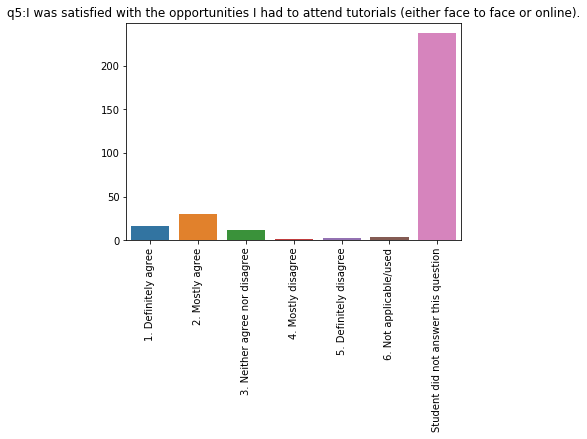

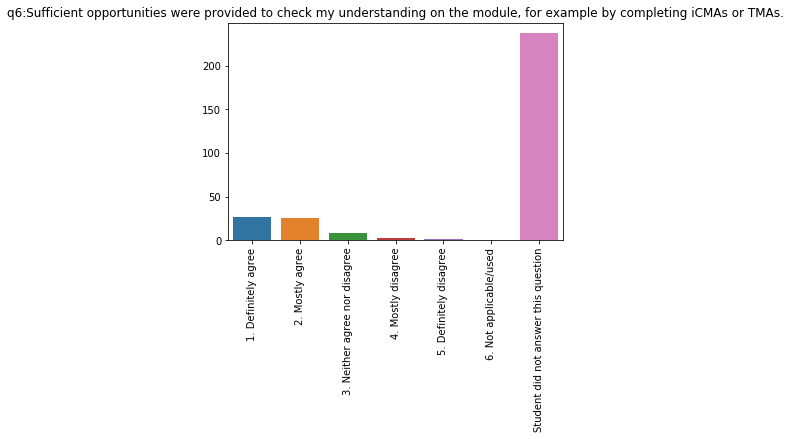

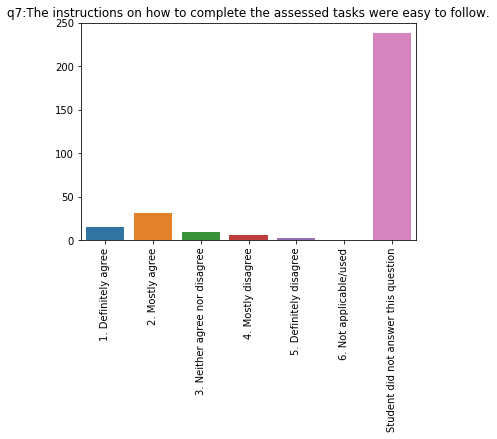

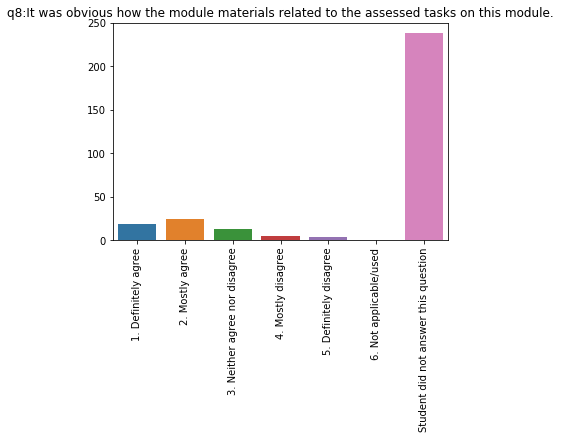

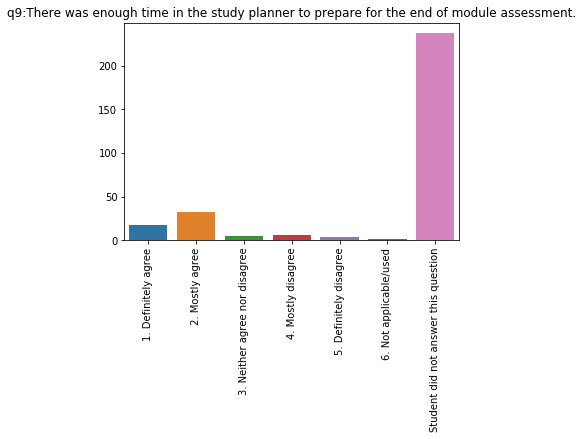

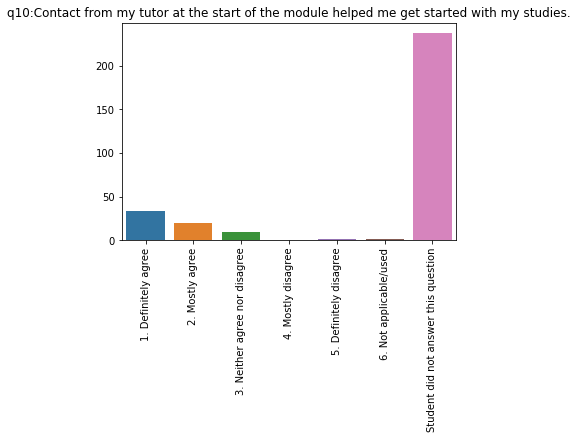

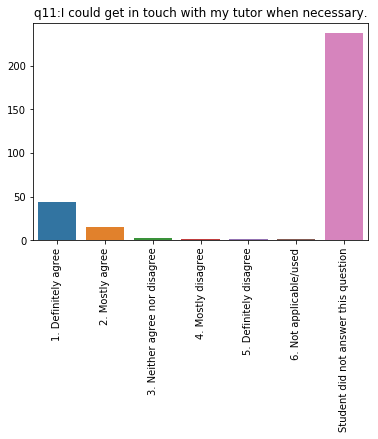

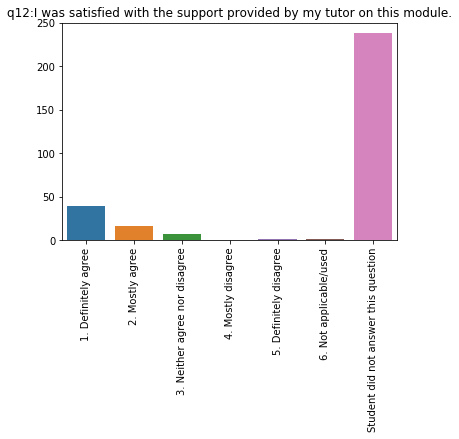

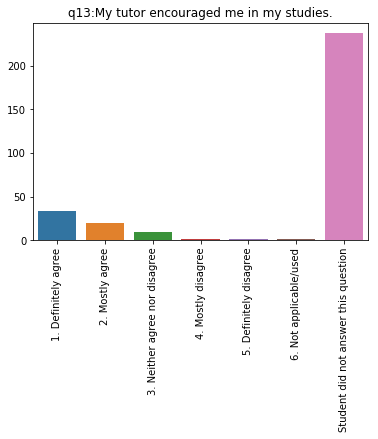

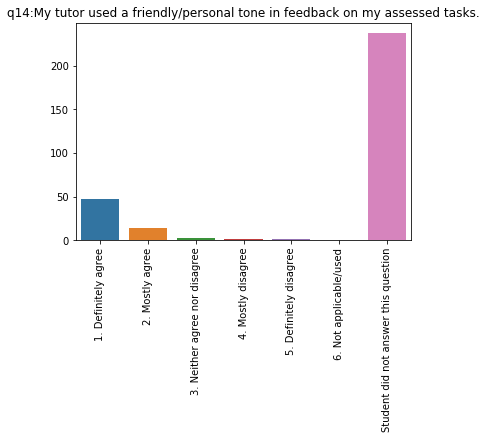

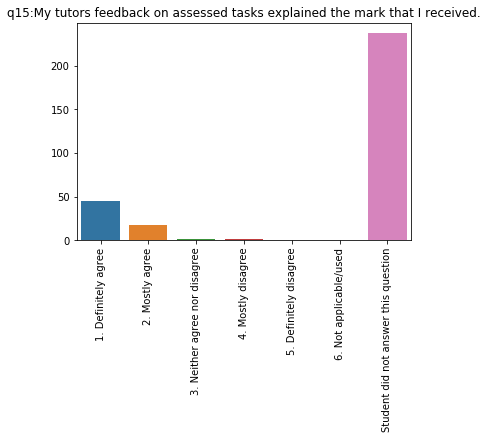

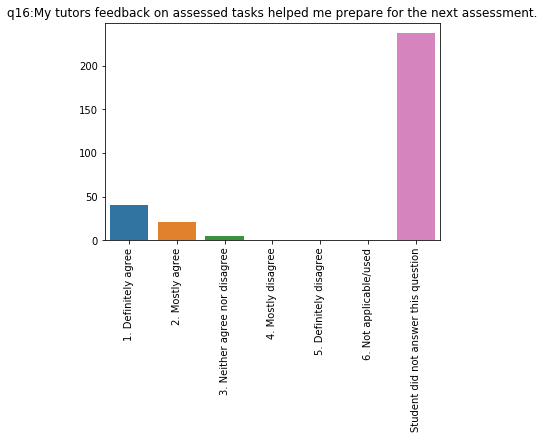

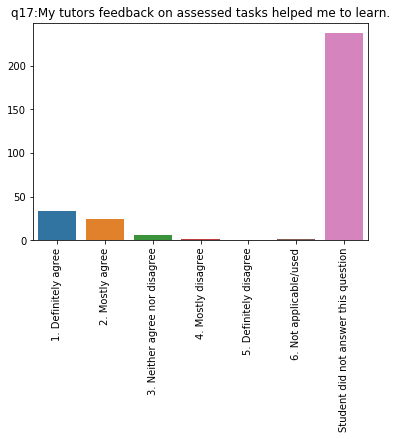

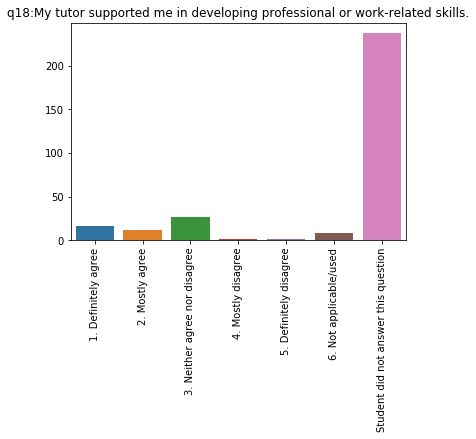

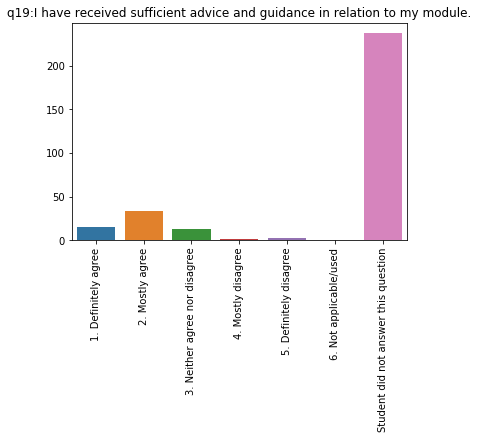

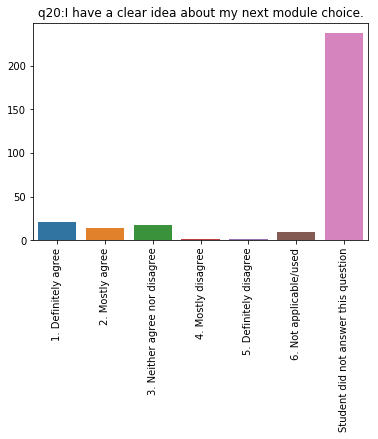

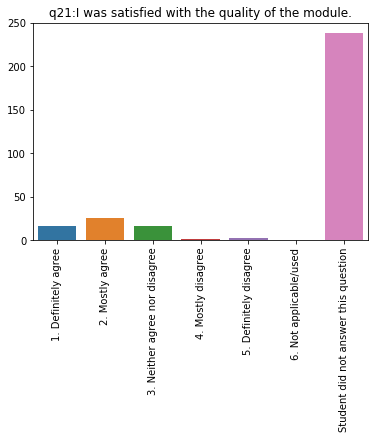

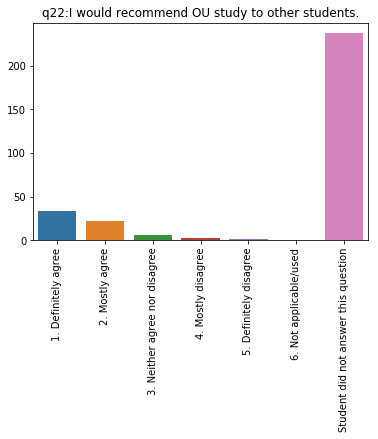

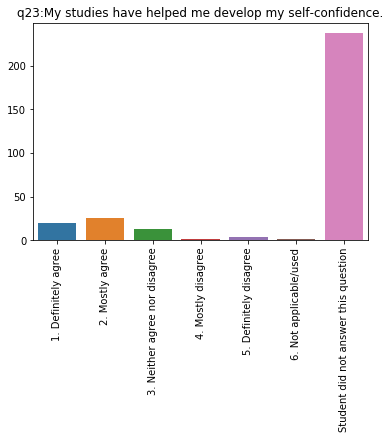

In [7]:
for q in range(len(plotData_df.index)):

    ax=sns.barplot(data=pd.DataFrame(plotData_df.iloc[q]).T)

    ax.set_title(plotData_df.index[q])
    
    plt.xticks(rotation=90)
    plt.show()

And now let's pretend that the 20% or so of students who actually responded are a representative sample, and redo the plots without the "didn't answer" column:

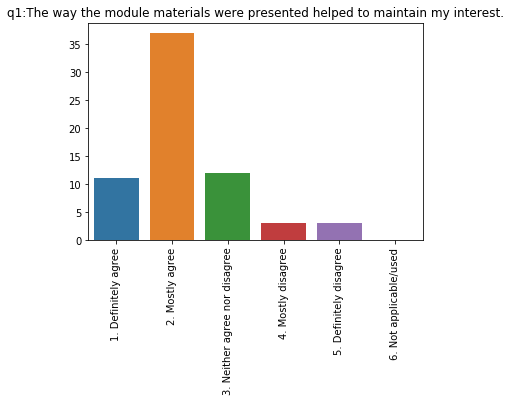

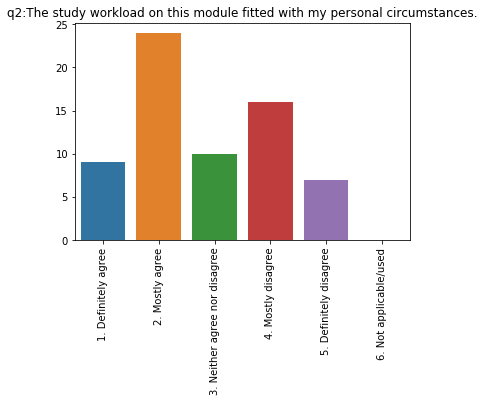

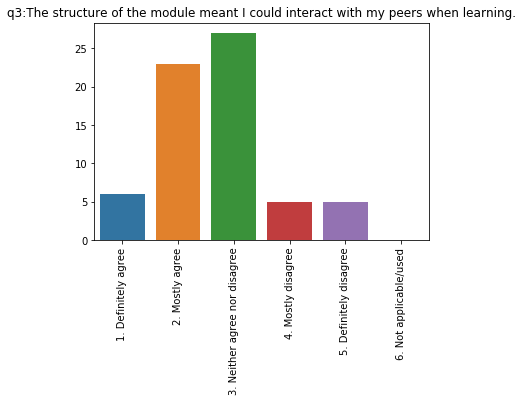

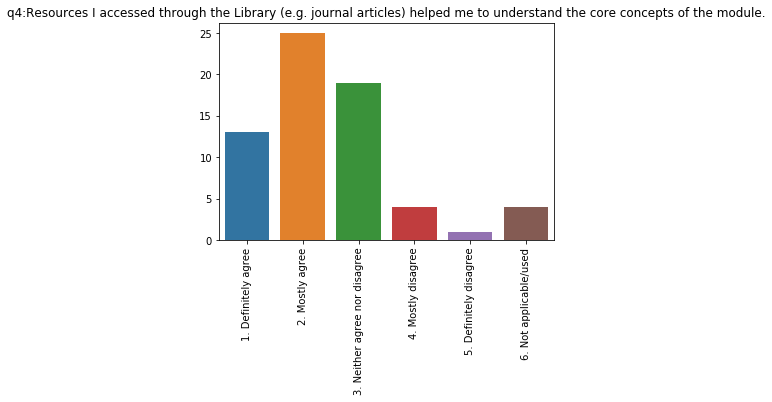

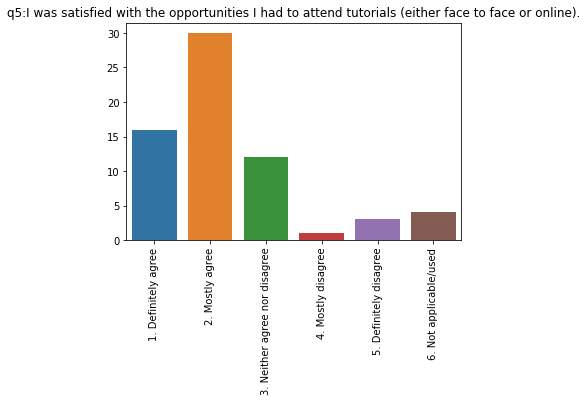

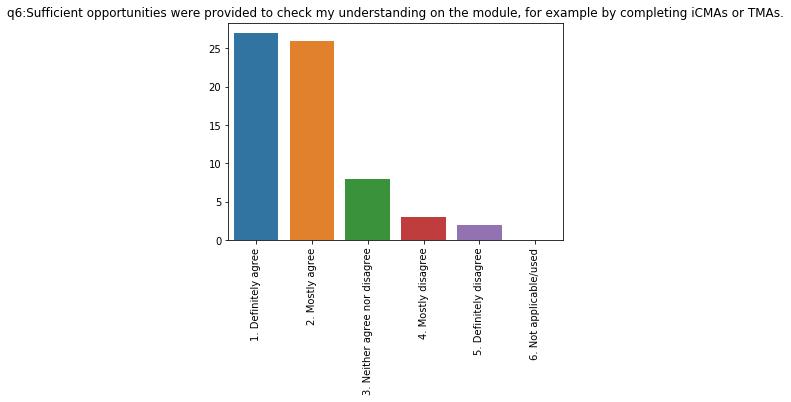

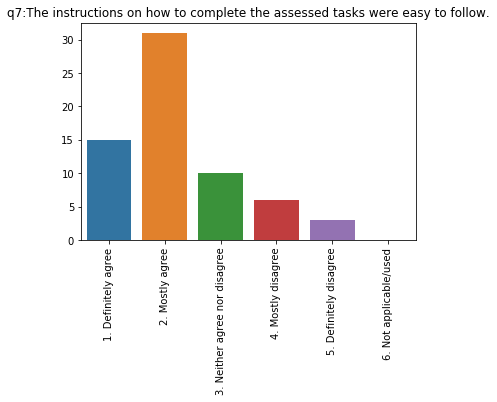

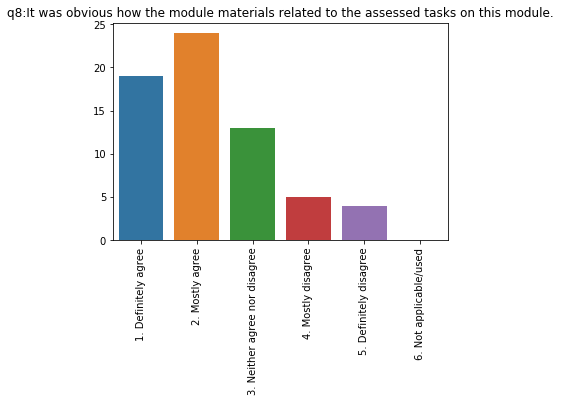

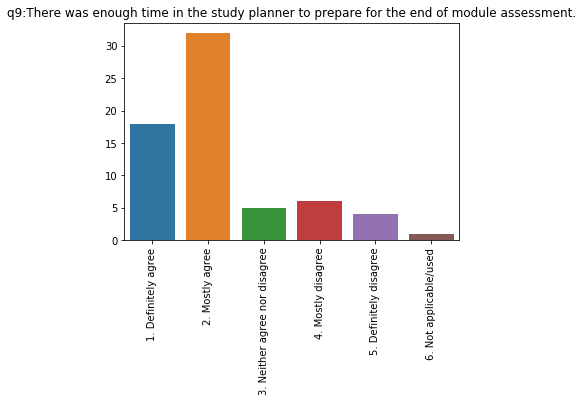

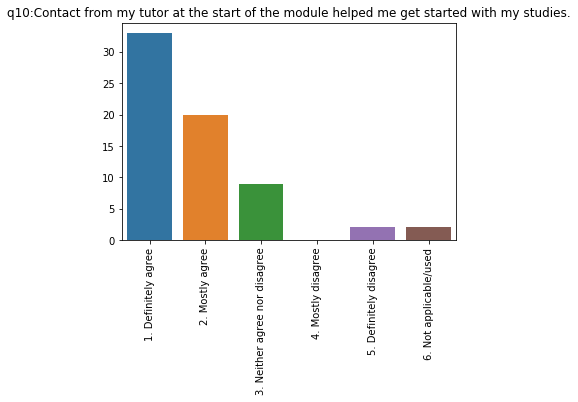

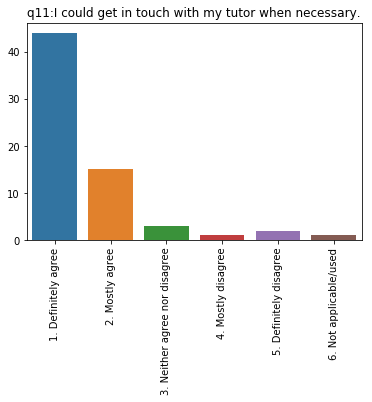

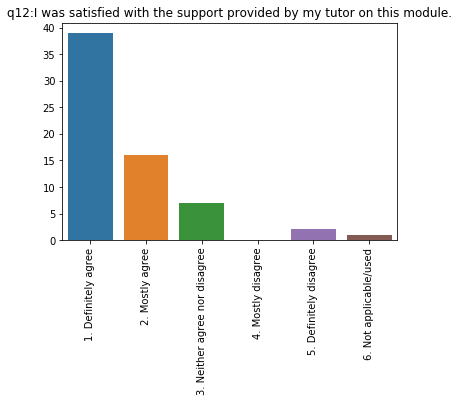

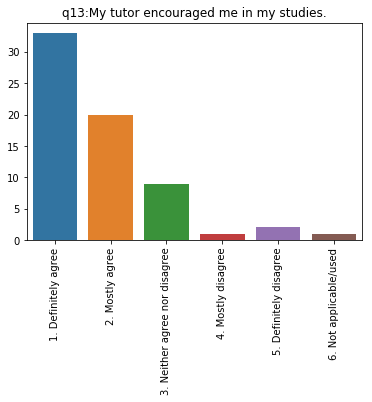

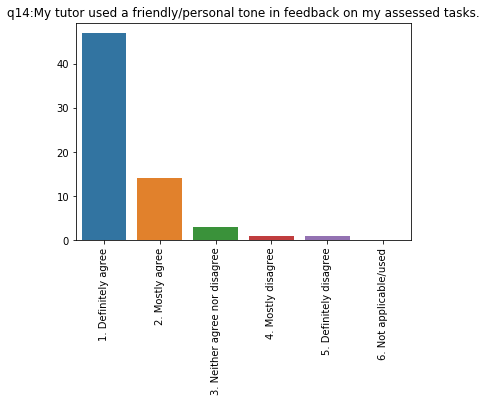

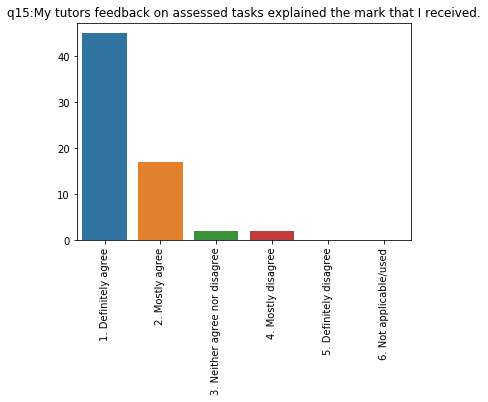

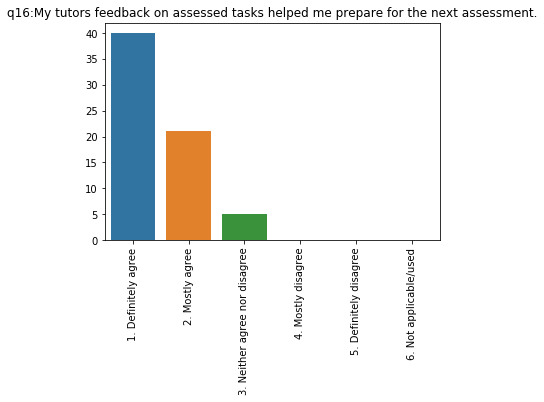

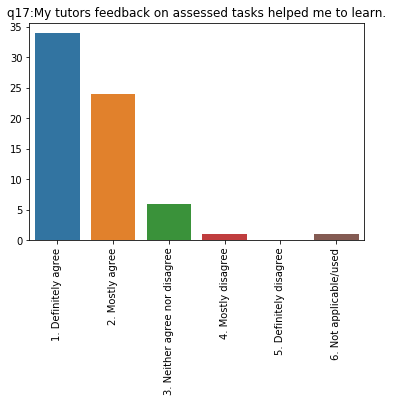

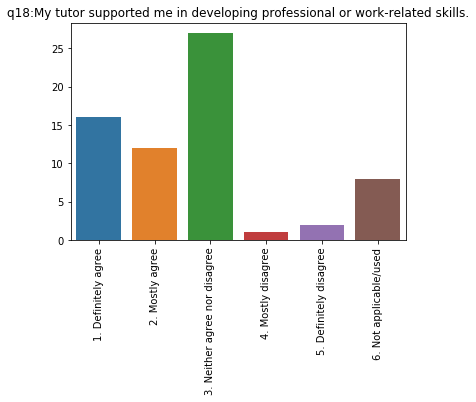

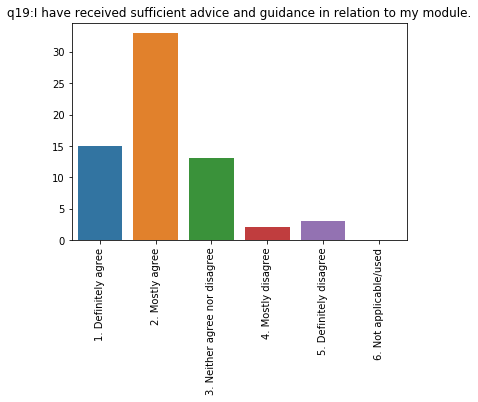

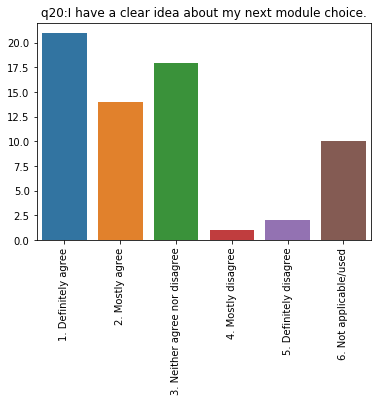

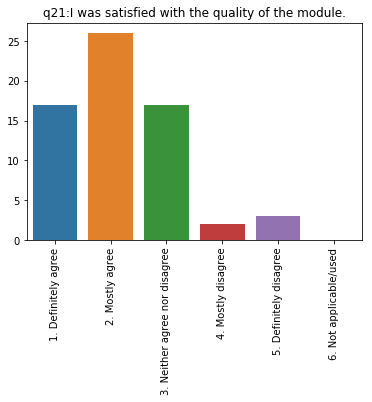

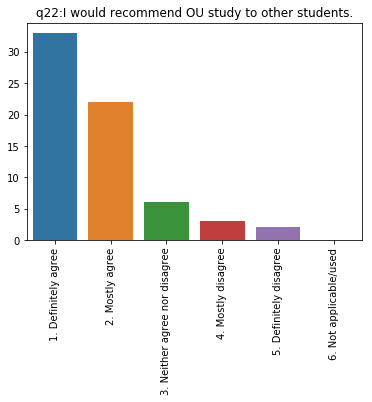

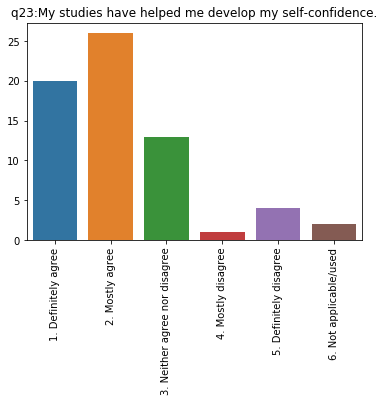

In [8]:
pd1_df=plotData_df[plotData_df.columns[:-1]]

for q in range(len(pd1_df.index)):

    ax=sns.barplot(data=(pd.DataFrame(pd1_df.iloc[q]).T))

    ax.set_title(pd1_df.index[q])
    
    plt.xticks(rotation=90)
    plt.show()